In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('train.csv')
test_data = pd.read_csv('tested_data.csv')


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.corr()['SalePrice']

C:\Users\Rachana\AppData\Local\Temp\ipykernel_19284\2274035091.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice']


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

<Axes: >

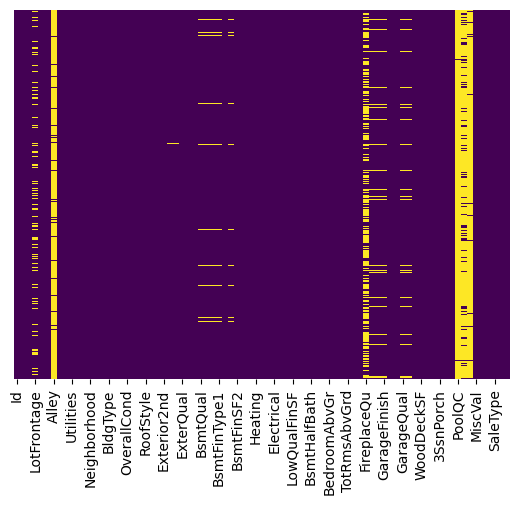

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
 df.shape

(1460, 81)

In [8]:
#filling lotfrontage value with its mean
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'],axis=1,inplace=True)

<Axes: >

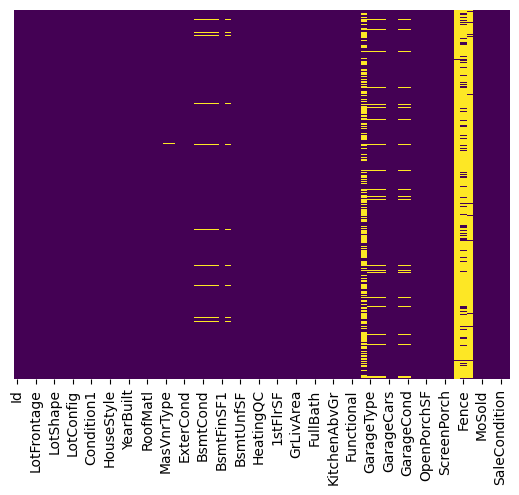

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])


In [12]:
df['Electrical'] =df['Electrical'].fillna(df['Electrical'].mode()[0])

In [13]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [14]:
df.drop(['FireplaceQu'], axis = 1, inplace = True)

In [15]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [16]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])


In [17]:
df.drop(['Id','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [18]:
df.shape

(1460, 75)

In [19]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [20]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

<Axes: >

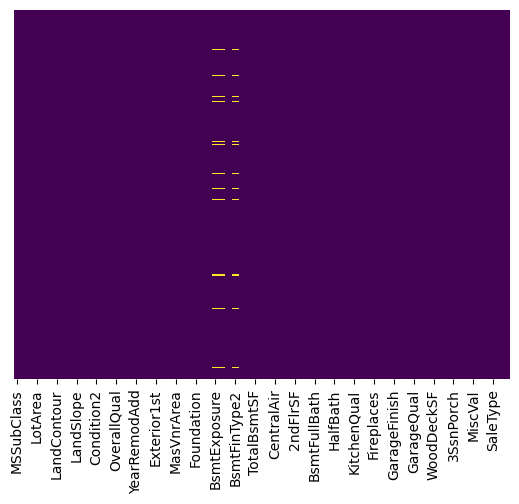

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<Axes: >

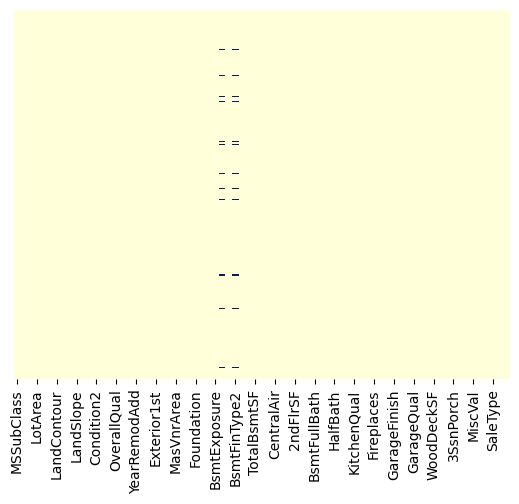

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [24]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [25]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [26]:
df.dropna(inplace=True)
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
603,160,FV,30.000000,3182,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,151000
1009,50,RL,60.000000,6000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,138,0,0,0,0,6,2006,WD,Normal,102000
964,60,RL,80.000000,11316,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,214900
753,60,RL,80.000000,10240,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,275500
1024,20,RL,70.049958,15498,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,174,0,0,0,0,5,2008,COD,Abnorml,287000


In [27]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood', 'Condition2','BldgType','Condition1','HouseStyle','SaleType','SaleCondition','ExterCond', 'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [28]:
len(columns)

38

In [29]:
def category_onehot_multcols(multcolumns):
  data_final = final_data
  i=0
  for fields in multcolumns:
    print(fields)
    df1 = pd.get_dummies(final_data[fields], drop_first = True)
    final_data.drop([fields], axis = 1, inplace = True)
    if i == 0:
      data_final = df1.copy()
    else:
      data_final = pd.concat([data_final, df1], axis =1)
    i= i+1
  data_final = pd.concat([final_data, data_final],axis =1)
  return data_final


In [30]:
main_df=df.copy()


In [31]:
df.shape

(1460, 75)

In [32]:
test_data.shape

(1459, 74)

In [33]:
final_data = pd.concat([df, test_data],axis =0)
#SalePrice column of test data will be null since there in no SalePrice column in test data.

In [34]:
final_data.shape

(2919, 75)

In [35]:
final_data=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [36]:
final_data.shape

(2919, 233)

In [37]:
final_data =final_data.loc[:,~final_data.columns.duplicated()]

In [38]:
final_data.shape

(2919, 177)

In [39]:
df_Train=final_data.iloc[:1460,:]
df_Test=final_data.iloc[1460:,:]

In [40]:
df_Train.shape

(1460, 177)

In [41]:
df_Test.shape

(1459, 177)

In [42]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Rachana\AppData\Local\Temp\ipykernel_19284\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [47]:
x_train = df_Train.drop(['SalePrice'], axis = 1)
y_train = df_Train['SalePrice']


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(df_Test)

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
model.fit(x_train_scaled, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(df_Train.drop(['SalePrice'], axis = 1))

C:\Users\Rachana\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [58]:
y_pred

array([ 7.12791188e+17,  1.38788936e+18,  3.33820631e+17, ...,
       -1.76113637e+17, -3.36076934e+19, -8.29512562e+18])

In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred)
print(mse)

2.9832456003615472e+37


In [61]:
rmse = np.sqrt(mse)
print(rmse)

5.461909556521004e+18
